In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
import re
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4'])
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('News.csv', index_col = 0)

In [32]:
df.head(5)

,text,class
0,Donald Trump s decision to choose Russian stat...,0
1,The GOP s anti-science stance is helping them ...,0
2,Donald Trump said Monday that Japan s SoftBank...,0
3,Add this name to the list of people you ve nev...,0
4,Jayme Liardi makes no secret of the fact that ...,0


In [22]:
df.shape

(44919, 5)

In [23]:
df = df.drop(["title", "subject","date"], axis = 1)

In [25]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [27]:
# Shuffling
df = df.sample(frac=1)
df.reset_index(inplace=True)
df.drop(["index"], axis=1, inplace=True)

## EDA

<Axes: xlabel='class', ylabel='count'>

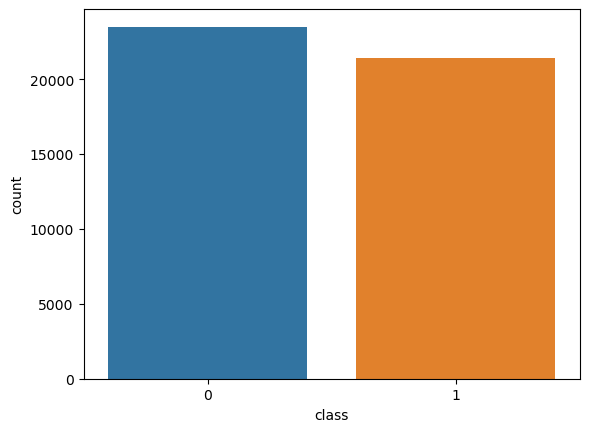

In [36]:
df = df
sns.countplot(x=df["class"])

In [39]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kshit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def preprocess_text(text_data):
	preprocessed_text = []
	
	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text


In [42]:
preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review

100%|██████████| 44919/44919 [1:26:14<00:00,  8.68it/s]  


### Wordcloud

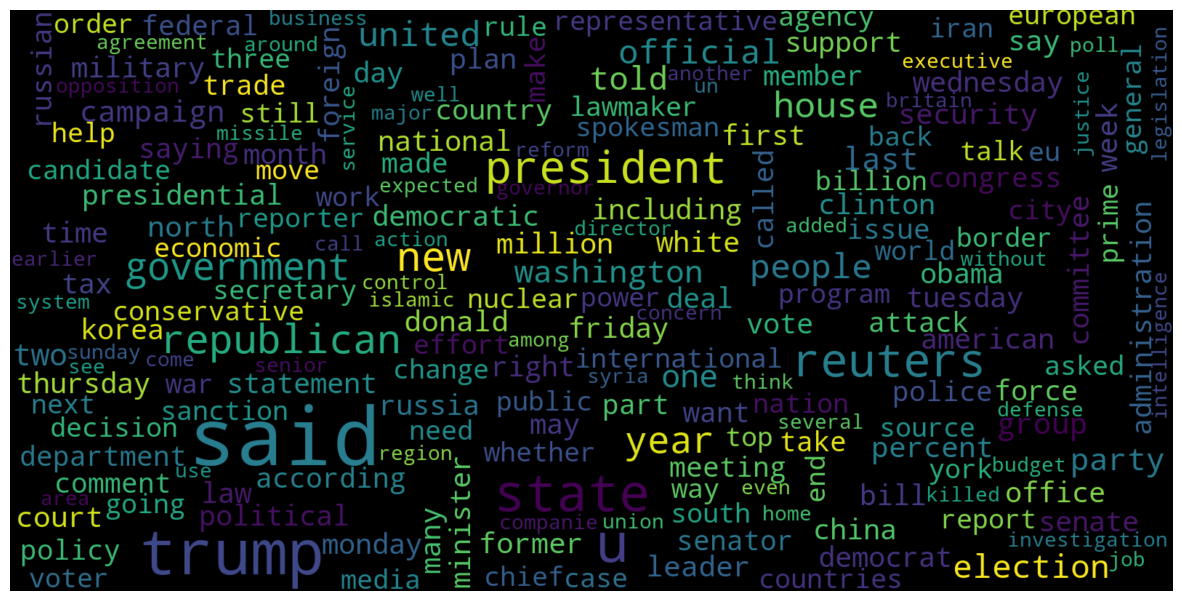

In [43]:
# Real
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

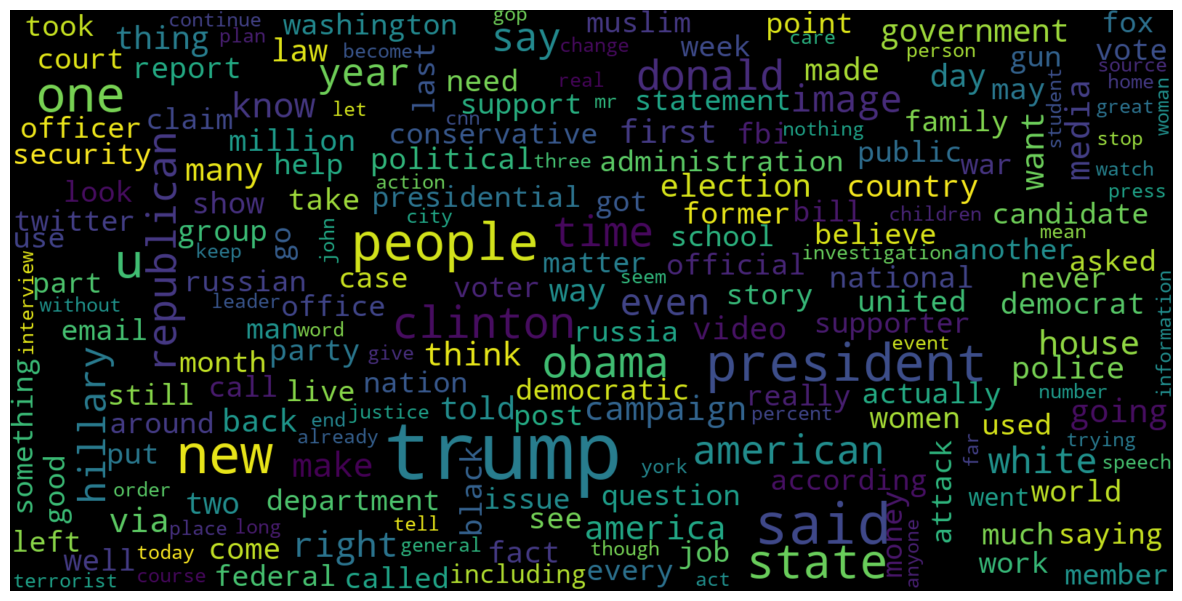

In [44]:
# Fake
consolidated = ' '.join(
    word for word in df['text'][df['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

### Barchart

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

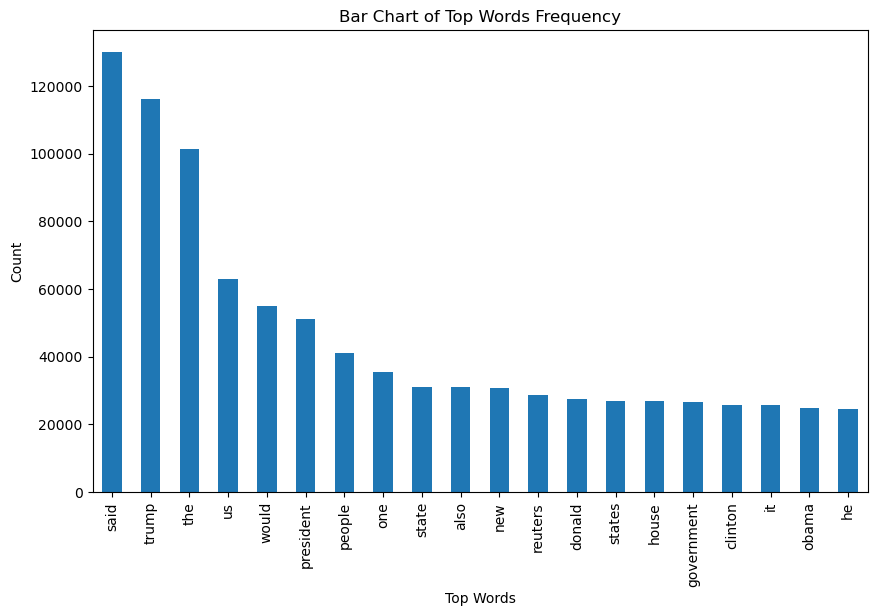

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
  
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

## Train test split

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
  
x_train, x_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['class'], 
                                                    test_size=0.25)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
  
vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

### Logistic Regression

In [69]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
predict1 = lg.predict(x_test)
accuracy_1 = accuracy_score(y_test,predict1)
print('Accuracy of training set : {:.2f}'.format(lg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(lg.score(x_test, y_test)))

Accuracy of training set : 0.99
Accuracy of  test set    : 0.99


In [81]:
cm = confusion_matrix(y_test,predict1)
cm

array([[5733,   68],
       [  58, 5371]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

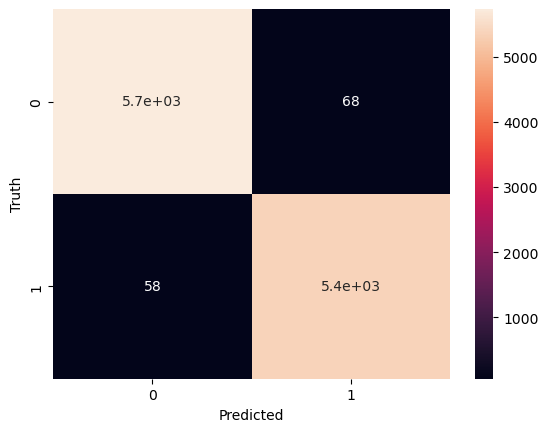

In [82]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [71]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [72]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.9888
Precision Score :  0.9887
Recall Score    :  0.9888
f1-Score        :  0.9888


### Decision Tree Classifier

In [73]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)
predict5=dt.predict(x_test)
accuracy_5 = accuracy_score(y_test,predict5)

In [75]:
print('Accuracy of training set : {:.2f}'.format(dt.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(dt.score(x_test, y_test)))

Accuracy of training set : 0.99
Accuracy of  test set    : 0.99


In [77]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[5755,   46],
       [  11, 5418]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

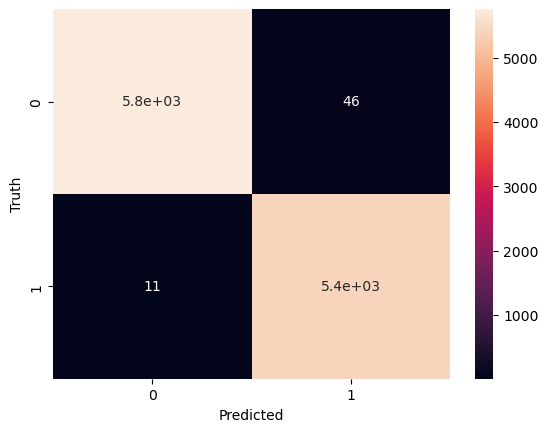

In [78]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [80]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  0.9949
Precision Score :  0.9948
Recall Score    :  0.995
f1-Score        :  0.9949


### Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predict3=rf.predict(x_test)
accuracy_3 = accuracy_score(y_test,predict3)
print('Accuracy of training set : {:.2f}'.format(rf.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(rf.score(x_test, y_test)))

Accuracy of training set : 1.00
Accuracy of  test set    : 0.99


In [85]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[5729,   72],
       [  48, 5381]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

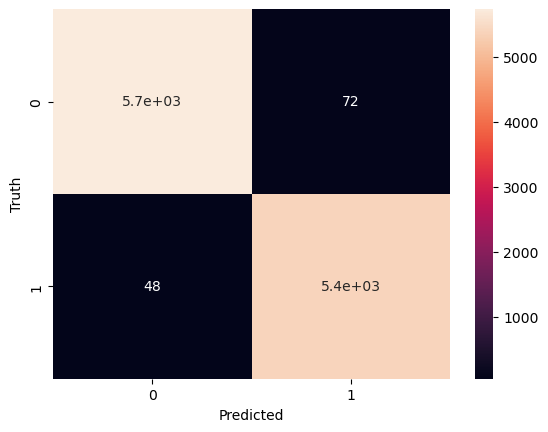

In [86]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [87]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  0.9893
Precision Score :  0.9892
Recall Score    :  0.9894
f1-Score        :  0.9893


### Model Evaluation

In [88]:
table = {'Classifier' : ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier'], "Train_Accuracy":[lg.score(x_train, y_train),rf.score(x_train, y_train),dt.score(x_train, y_train),], 'Test_Accuracy' : [accuracy_1, accuracy_3, accuracy_5], 'Precision Score' : [precision_1, precision_3, precision_5], 'Recall Score' : [recall_1, recall_3, recall_5], 'F1_Score' : [f1_1, f1_3, f1_5]}
table = pd.DataFrame(table)
table.sort_values(["Test_Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Train_Accuracy,Test_Accuracy,Precision Score,Recall Score,F1_Score
0,Logistic Regression,0.993588,0.9888,0.9887,0.9888,0.9888
1,Random Forest Classifier,1.000000,0.9893,0.9892,0.9894,0.9893
2,Decision Tree Classifier,0.994152,0.9949,0.9948,0.9950,0.9949


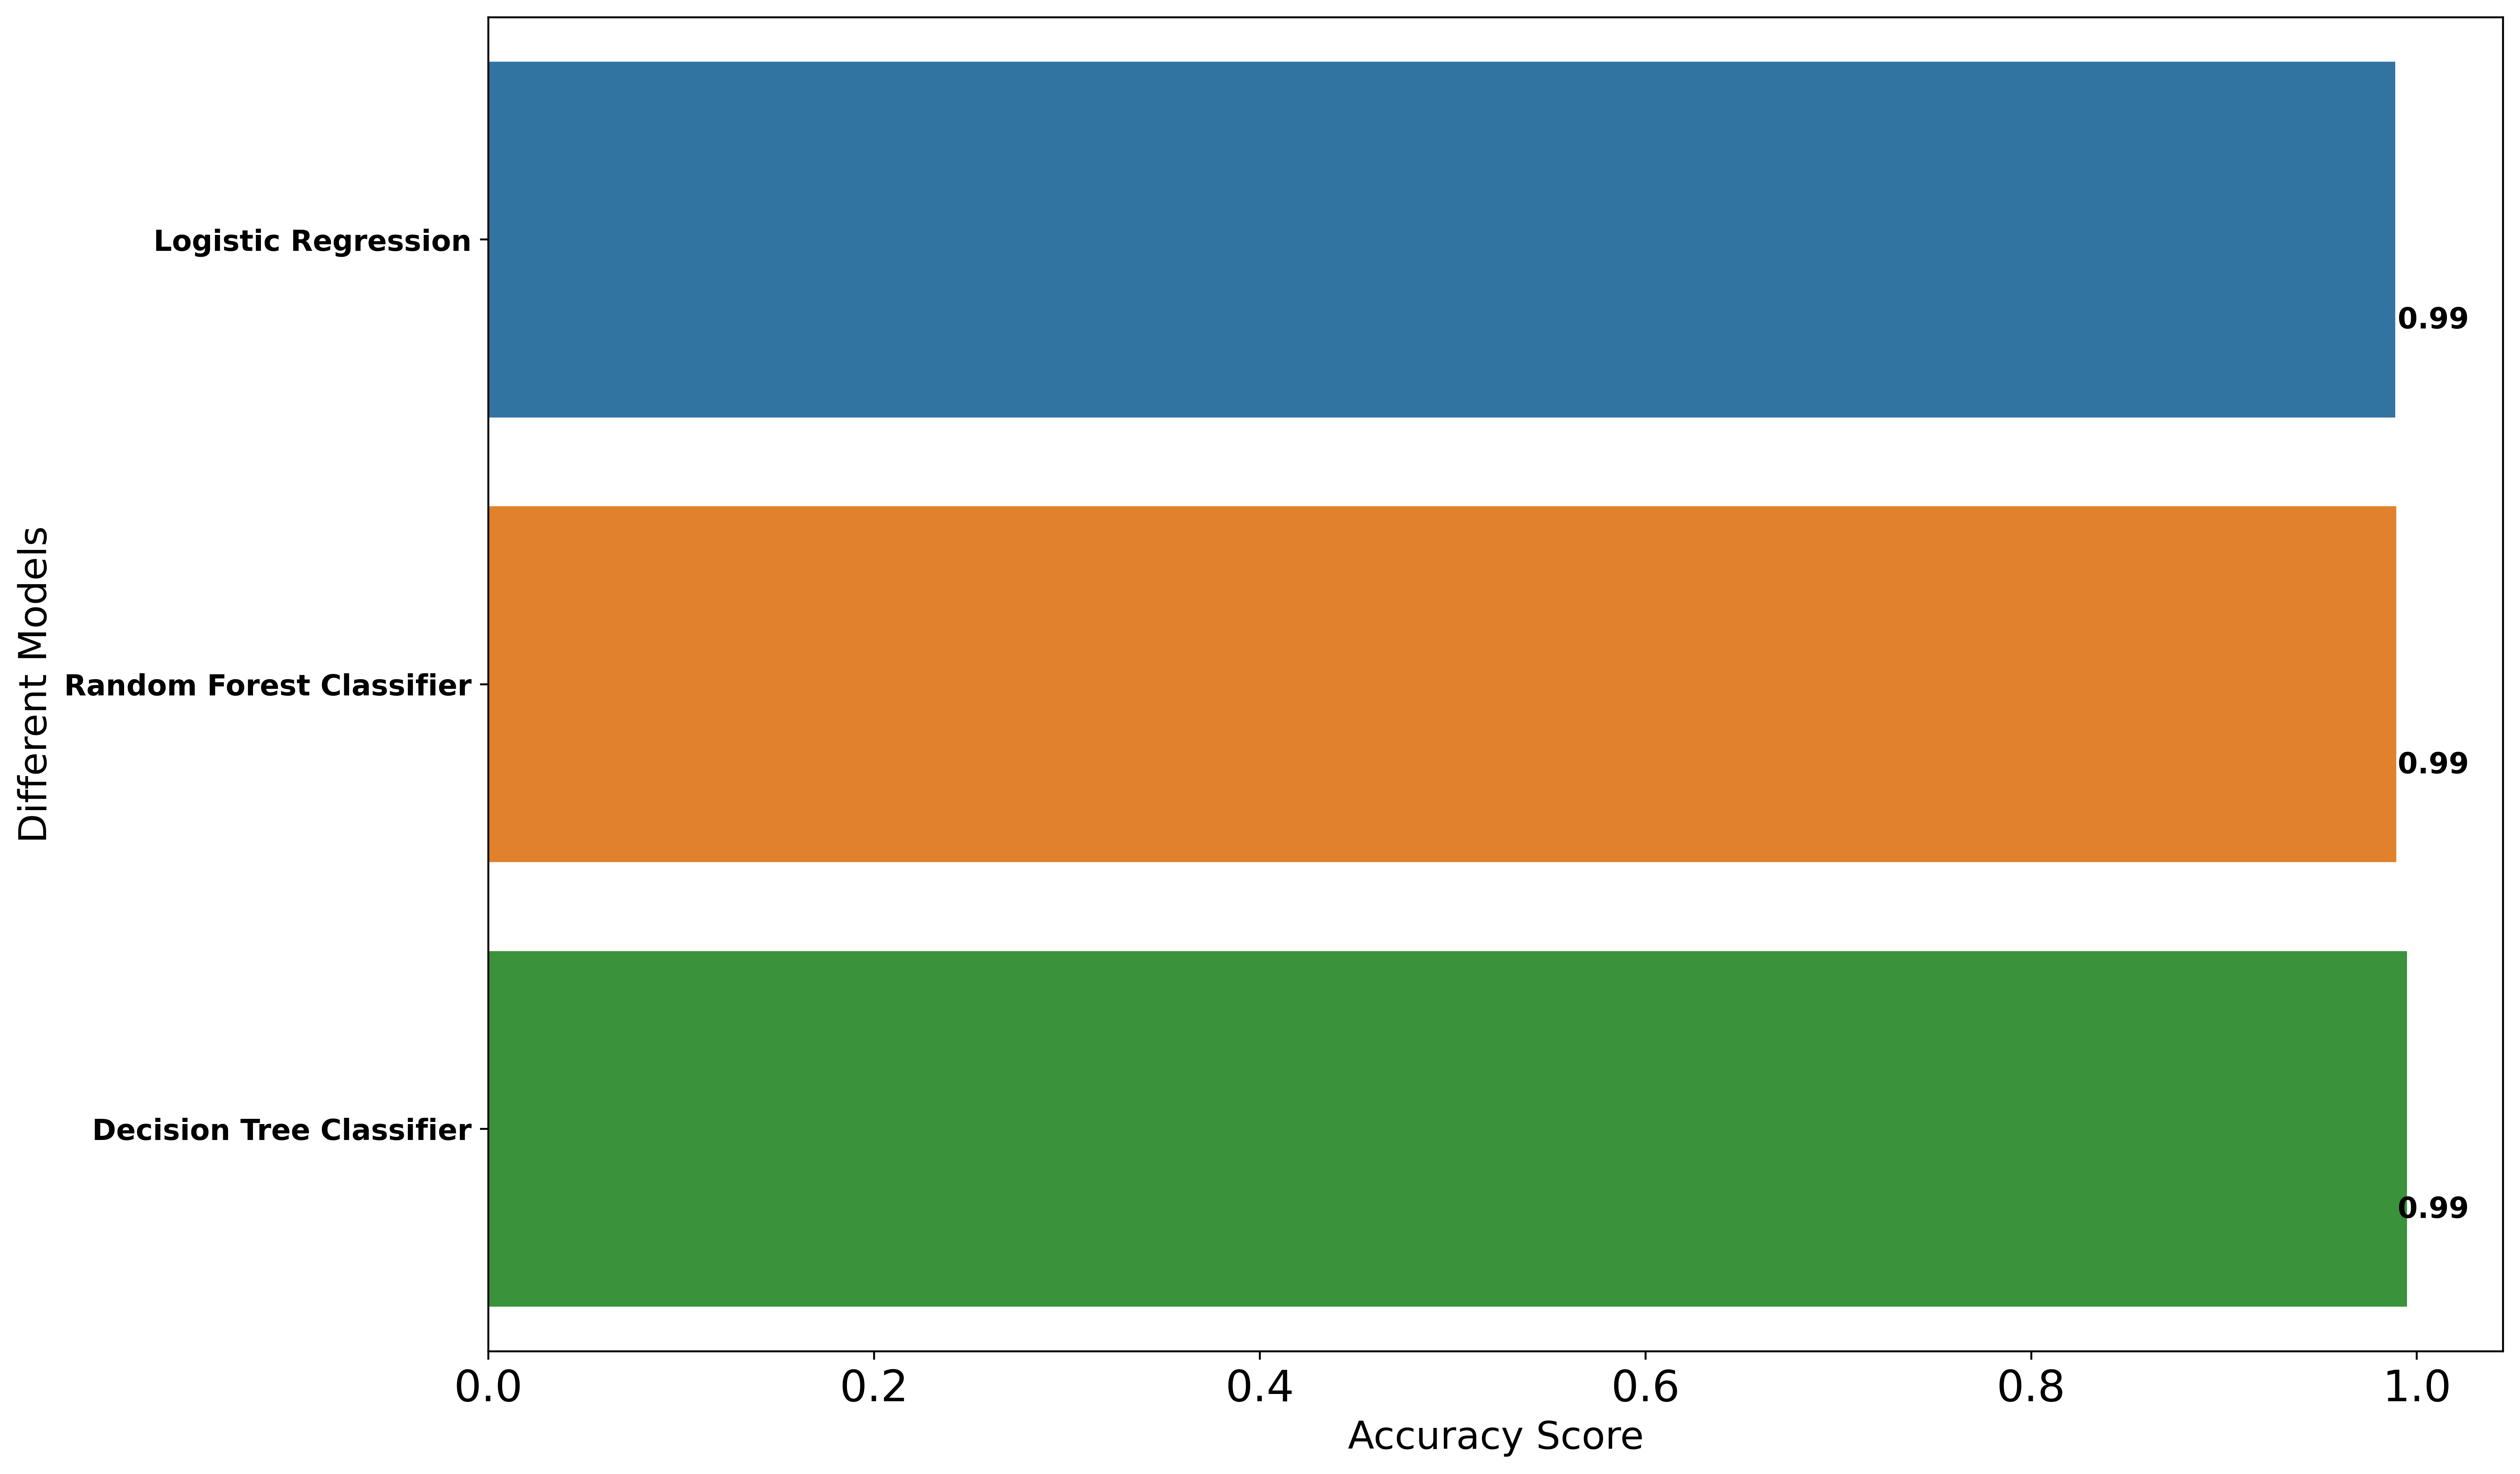

In [89]:
f,axe = plt.subplots(figsize=(15,10),dpi=500)
sns.barplot(x='Test_Accuracy', y='Classifier', data=table, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table.Test_Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()

In [ ]:
-